## **Import libraries**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

## **Import data**

In [139]:
# Specify the quiniela you want to import (i.e., nacional, buenos_aires, misiones, etc.)
quiniela_name = 'nacional'
raw_df = pd.read_csv('./data_source/quiniela_{}.csv'.format(quiniela_name))

df_quiniela = raw_df.copy()
df_quiniela.head()

,lottery_date,quiniela,period,position,result
0,2014-11-01,nacional,primera,1,3940
1,2014-11-01,nacional,primera,2,6857
2,2014-11-01,nacional,primera,3,609
3,2014-11-01,nacional,primera,4,8018
4,2014-11-01,nacional,primera,5,3232


## **Explore and clean data**

In [140]:
# Check data types, null and total values.
df_quiniela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191060 entries, 0 to 191059
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   lottery_date  191060 non-null  object
 1   quiniela      191060 non-null  object
 2   period        191060 non-null  object
 3   position      191060 non-null  int64 
 4   result        191060 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 7.3+ MB


### Fix data types
*Note: 'position' is categorical ordinal data, but to the effects of creating position groups -see betting options-, it will be treated as numerical data.*

In [141]:
# Modify 'lottery_date' to type DATE.
df_quiniela['lottery_date'] = pd.to_datetime(df_quiniela['lottery_date'])
# Parse 'result' as TEXT with 4 characters an leading zeros. This feature is categorical nominal data.
df_quiniela['result'] = df_quiniela['result'].astype(str).str.zfill(4)

df_quiniela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191060 entries, 0 to 191059
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   lottery_date  191060 non-null  datetime64[ns]
 1   quiniela      191060 non-null  object        
 2   period        191060 non-null  object        
 3   position      191060 non-null  int64         
 4   result        191060 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.3+ MB


In [142]:
# Check leading zeros for 'result'
df_quiniela.head()

,lottery_date,quiniela,period,position,result
0,2014-11-01,nacional,primera,1,3940
1,2014-11-01,nacional,primera,2,6857
2,2014-11-01,nacional,primera,3,0609
3,2014-11-01,nacional,primera,4,8018
4,2014-11-01,nacional,primera,5,3232


### Add new columns, splitting results by betting options
This features will allow us to analyze occurrences by types of bets availables
(1 digit, 2 digits, 3 digits, 4 digits - https://www.laquinieladetucuman.com.ar/quiniela-nacional/cuanto-paga-premios)
> To analyze results individually and grouped by number of digits, the new columns will be formatted as numbers

In [143]:
# Four digits
df_quiniela['digits_4'] = df_quiniela['result'].astype(int)
# Three digits
df_quiniela['digits_3'] = df_quiniela['result'].str[-3:].astype(int)
# Two digits
df_quiniela['digits_2'] = df_quiniela['result'].str[-2:].astype(int)

# First digit column
df_quiniela['first_digit'] = df_quiniela['result'].str[-4].astype(int)
# Second digit column
df_quiniela['second_digit'] = df_quiniela['result'].str[-3].astype(int)
# Third digit column
df_quiniela['third_digit'] = df_quiniela['result'].str[-2].astype(int)
# Fourth & One digit column
df_quiniela['fourth_digit'] = df_quiniela['result'].str[-1].astype(int)

df_quiniela.head()

,lottery_date,quiniela,period,position,result,digits_4,digits_3,digits_2,first_digit,second_digit,third_digit,fourth_digit
0,2014-11-01,nacional,primera,1,3940,3940,940,40,3,9,4,0
1,2014-11-01,nacional,primera,2,6857,6857,857,57,6,8,5,7
2,2014-11-01,nacional,primera,3,0609,609,609,9,0,6,0,9
3,2014-11-01,nacional,primera,4,8018,8018,18,18,8,0,1,8
4,2014-11-01,nacional,primera,5,3232,3232,232,32,3,2,3,2


### Add position group
This feature will allow us to analyze occurrences by betting options in position groups
(a 1, a los 5, a los 10, a los 15, a los 20 - https://www.laquinieladetucuman.com.ar/quiniela-nacional/cuanto-paga-premios)

In [165]:
# Function to classify positions in groups
def classify_positions(position_number):

    if position_number == 1: return 'a_1'
    elif position_number <= 5: return 'a_los_5'
    elif position_number <= 10: return 'a_los_10'
    elif position_number <= 15: return 'a_los_15'
    elif position_number <= 20: return 'a_los_20'

In [168]:
# Create new column and apply classification of position groups to each occurrence
df_quiniela['position_group'] = df_quiniela['position'].apply(lambda x: classify_positions(x))

# Check classification results
df_quiniela.head(21)

,lottery_date,quiniela,period,position,result,digits_4,digits_3,digits_2,first_digit,second_digit,third_digit,fourth_digit,day_of_week,month_day,position_group
0,2014-11-01,nacional,primera,1,3940,3940,940,40,3,9,4,0,5,11-01,a_1
1,2014-11-01,nacional,primera,2,6857,6857,857,57,6,8,5,7,5,11-01,a_los_5
2,2014-11-01,nacional,primera,3,0609,609,609,9,0,6,0,9,5,11-01,a_los_5
3,2014-11-01,nacional,primera,4,8018,8018,18,18,8,0,1,8,5,11-01,a_los_5
4,2014-11-01,nacional,primera,5,3232,3232,232,32,3,2,3,2,5,11-01,a_los_5
5,2014-11-01,nacional,primera,6,9538,9538,538,38,9,5,3,8,5,11-01,a_los_10
6,2014-11-01,nacional,primera,7,4258,4258,258,58,4,2,5,8,5,11-01,a_los_10
7,2014-11-01,nacional,primera,8,3722,3722,722,22,3,7,2,2,5,11-01,a_los_10
8,2014-11-01,nacional,primera,9,2182,2182,182,82,2,1,8,2,5,11-01,a_los_10
9,2014-11-01,nacional,primera,10,6112,6112,112,12,6,1,1,2,5,11-01,a_los_10


### Look at distributions

In [169]:
# Create function to display distributions based on period, digit options for results, and position group
def display_distribution(period_in, number_in, position_in=''):

    plt.figure(figsize=(15,3))
    # Determine the title text to be displayed, depending on what -if any- position group is passed as an argument
    position_string = ('positon ' + position_in) if position_in != '' else 'no particular position'
    # Define the title of the chart, based on the selections, to make it descriptive of what you are looking at
    plt.title('Results distribution by number of digits in {} {}, for {} and {}'.format(quiniela_name, period_in, number_in, position_string), fontsize=20)

    # Create a temporary dataframe, filtering by the period and position group passed as an argument to the function
    df_temp = df_quiniela[
        (df_quiniela['period'] == period_in) 
        & (df_quiniela['position_group'] == position_in if position_in != '' else df_quiniela['position'] <= 20)
        ].sort_values(by=number_in)

    # Change the number of bins based on number of digits: 100 if it is more than 1, 10 if it is one digit
    bin_number = 100 if 'digits' in number_in else 10

    # Create the histogram for the selected number
    plt.hist(df_temp[number_in], bins=bin_number)

    return plt.show()

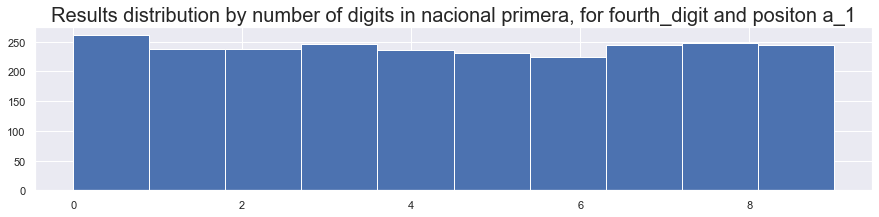

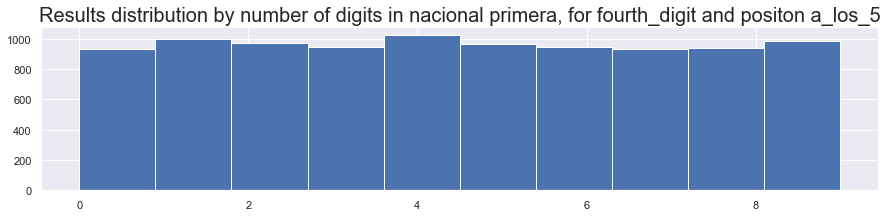

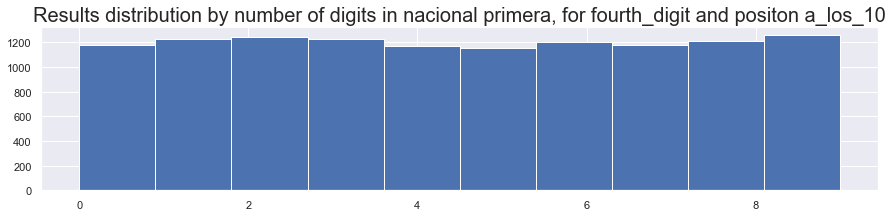

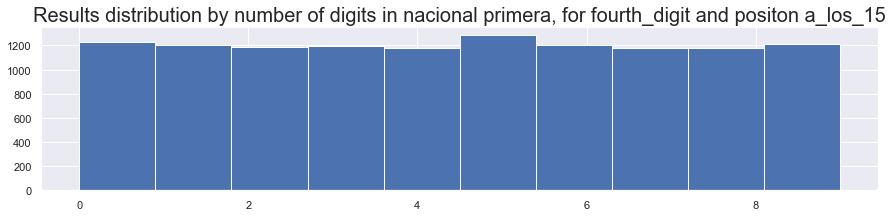

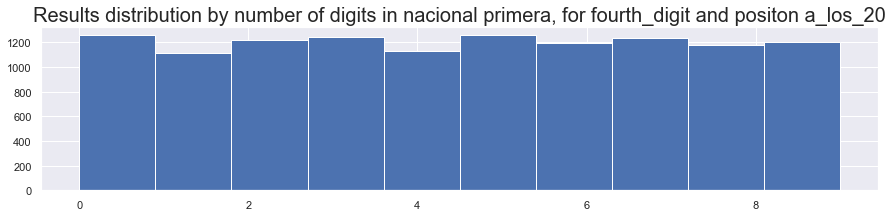

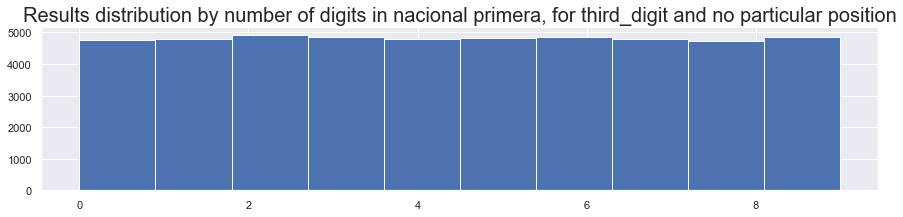

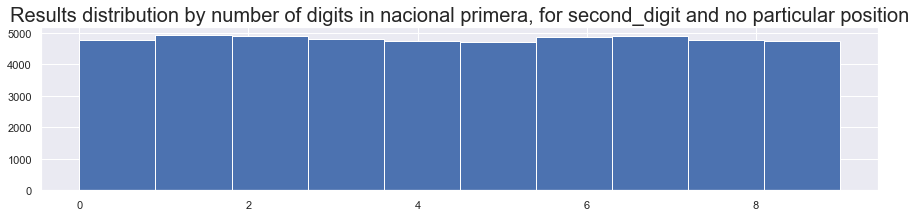

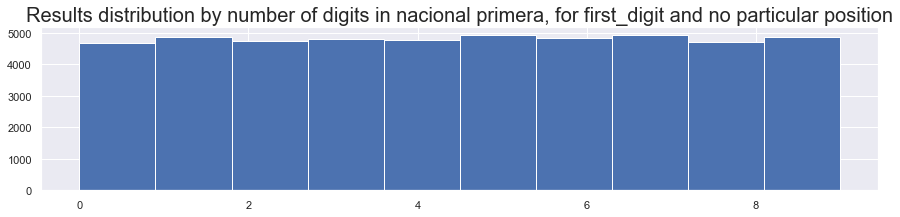

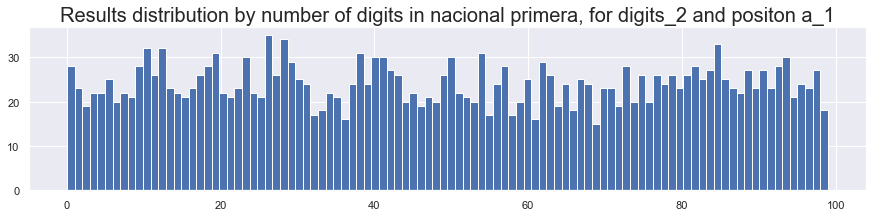

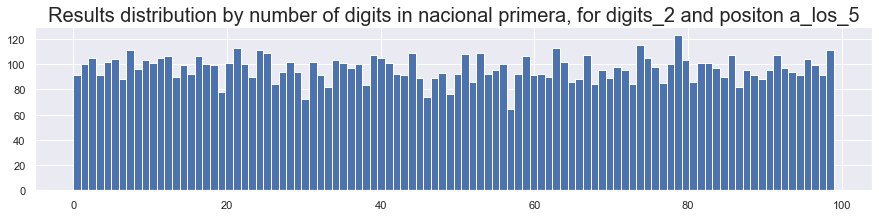

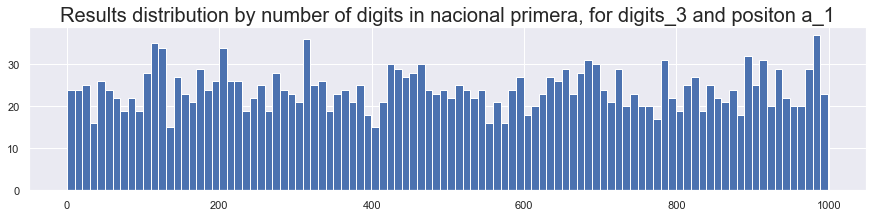

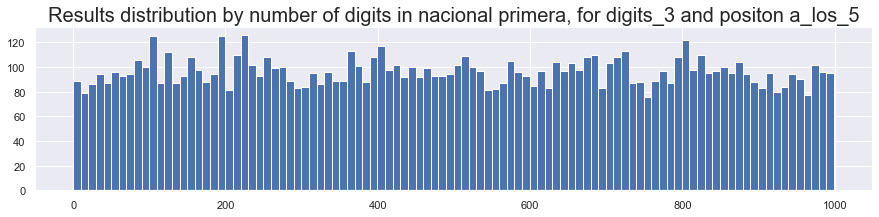

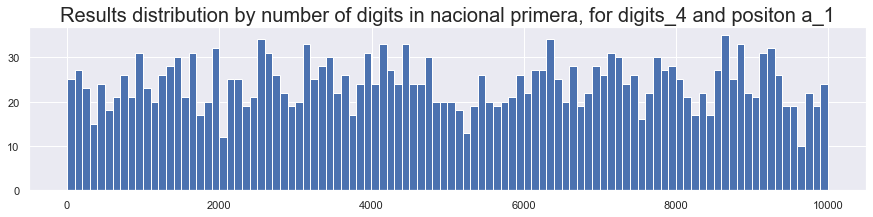

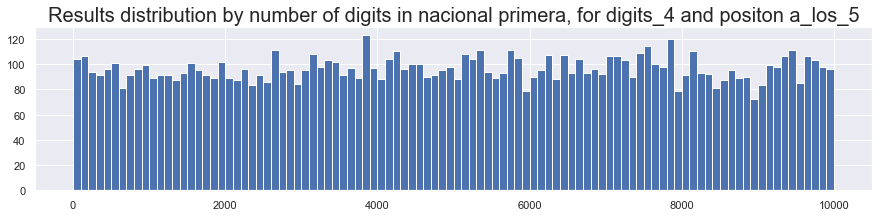

In [174]:
# Check the Quiniela's results distribution by different periods and position groups 
plot_period = 'primera'
display_distribution(plot_period, 'fourth_digit', 'a_1')
display_distribution(plot_period, 'fourth_digit', 'a_los_5')
display_distribution(plot_period, 'fourth_digit', 'a_los_10')
display_distribution(plot_period, 'fourth_digit', 'a_los_15')
display_distribution(plot_period, 'fourth_digit', 'a_los_20')

display_distribution(plot_period, 'third_digit') # Total, no specific position
display_distribution(plot_period, 'second_digit') # Total, no specific position
display_distribution(plot_period, 'first_digit') # Total, no specific position
display_distribution(plot_period, 'digits_2', 'a_1')
display_distribution(plot_period, 'digits_2', 'a_los_5')
display_distribution(plot_period, 'digits_3', 'a_1')
display_distribution(plot_period, 'digits_3', 'a_los_5')
display_distribution(plot_period, 'digits_4', 'a_1')
display_distribution(plot_period, 'digits_4', 'a_los_5')

*Distributions for a specific digit, at any position, are uniform. When looking at more than one digit, distributions stay pretty much uniform, with larger variations at the first position*

### Add day of week and month-day
This two new features will allow us to analyze occurrences by the day of the week and also by the day of the month

In [ ]:
# Add day of the week - Monday is 0 and Sunday is 6
df_quiniela['day_of_week'] = df_quiniela['lottery_date'].apply(lambda x: x.weekday())
# Add day and month
df_quiniela['month_day'] = df_quiniela['lottery_date'].dt.strftime('%m-%d')

df_quiniela.head()

,lottery_date,quiniela,period,position,result,digits_4,digits_3,digits_2,first_digit,second_digit,third_digit,fourth_digit,day_of_week,month_day
0,2014-11-01,nacional,primera,1,3940,3940,940,40,3,9,4,0,5,11-01
1,2014-11-01,nacional,primera,2,6857,6857,857,57,6,8,5,7,5,11-01
2,2014-11-01,nacional,primera,3,0609,609,609,9,0,6,0,9,5,11-01
3,2014-11-01,nacional,primera,4,8018,8018,18,18,8,0,1,8,5,11-01
4,2014-11-01,nacional,primera,5,3232,3232,232,32,3,2,3,2,5,11-01


In [ ]:
# Create function to display distributions without repeating code in each
def display_occurrences_in_time(period_in, number_in):

    plt.figure(figsize=(20,10))

    

    line_chart = sns.lineplot(
        x = df_quiniela['day_of_week'], 
        y = df_quiniela[number_in].count(), 
        data = df_quiniela[df_quiniela['period'] == period_in]
        )

    line_chart.set_ylabel('Result')
    line_chart.set_title('Result occurrence by day of the week (Mon = 0 - Sat = 5)')
    line_chart.set_xlim(0,5)
    line_chart.set_ylim(0,10)
    
    return plt.show()

In [ ]:
display_occurrences_in_time('primera', 'fourth_digit')

play:
a 1
a los 5
a los 10
a los 15
a los 20